# Analysing relation between academic stress and smartphone dependence

## Discription:
Linear regression analysis was used to investigate the relationship among the variables. The results showed that academic stress was positively related to psychological distress, which may further lead to severe smartphone dependence. Psychological distress partially mediated the relationship between academic stress and smartphone dependence. The mediating effect of psychological distress between academic stress and smartphone dependence was moderated by academic resilience. Specifically, academic resilience weakened the indirect relationship between academic stress and smartphone dependence that was mediated by psychological distress. 

### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Exploring the Data

In [4]:
df = pd.read_csv('processed data values.csv')

In [5]:
df.head()

,age,sex,pd,ma,INT,ar,as
0,1.403848,-1.214255,2.610569,0.374475,-0.161695,0.276746,-1.846253
1,-0.225167,0.835731,-1.320665,-0.751306,-0.899913,1.445336,-0.885314
2,-0.225167,0.835731,-0.497849,-0.751306,0.538828,0.551709,0.395937
3,1.403848,0.835731,-0.863545,-0.821668,-0.896244,-1.230757,1.036563
4,1.403848,0.835731,0.507816,-1.032751,0.146729,-0.479400,0.395937


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
age    49 non-null float64
sex    49 non-null float64
pd     49 non-null float64
ma     49 non-null float64
INT    49 non-null float64
ar     49 non-null float64
as     49 non-null float64
dtypes: float64(7)
memory usage: 2.8 KB


In [8]:
df.head()

,age,sex,pd,ma,INT,ar,as
0,1.403848,-1.214255,2.610569,0.374475,-0.161695,0.276746,-1.846253
1,-0.225167,0.835731,-1.320665,-0.751306,-0.899913,1.445336,-0.885314
2,-0.225167,0.835731,-0.497849,-0.751306,0.538828,0.551709,0.395937
3,1.403848,0.835731,-0.863545,-0.821668,-0.896244,-1.230757,1.036563
4,1.403848,0.835731,0.507816,-1.032751,0.146729,-0.479400,0.395937


In [9]:
df.describe()

,age,sex,pd,ma,INT,ar,as
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,0.007550,0.208185,0.073162,0.064370,-0.176325,0.055951,0.075624
std,1.102848,0.954591,1.150129,0.988190,0.925921,1.078092,0.969795
min,-3.483197,-1.214255,-1.320665,-1.736365,-3.615668,-2.816581,-2.486878
25%,-0.225167,-1.214255,-0.680697,-0.751306,-0.567178,-0.582441,-0.565001
50%,-0.225167,0.835731,-0.315001,0.022668,0.146729,0.001784,0.075624
75%,1.403848,0.835731,1.056360,0.796643,0.336655,0.620449,0.716250
max,1.403848,0.835731,2.884841,2.274231,0.970451,2.064002,1.997501


In [10]:
df.columns

Index(['age', 'sex', 'pd', 'ma', 'INT', 'ar', 'as'], dtype='object')

# Exploratory Data Analysis

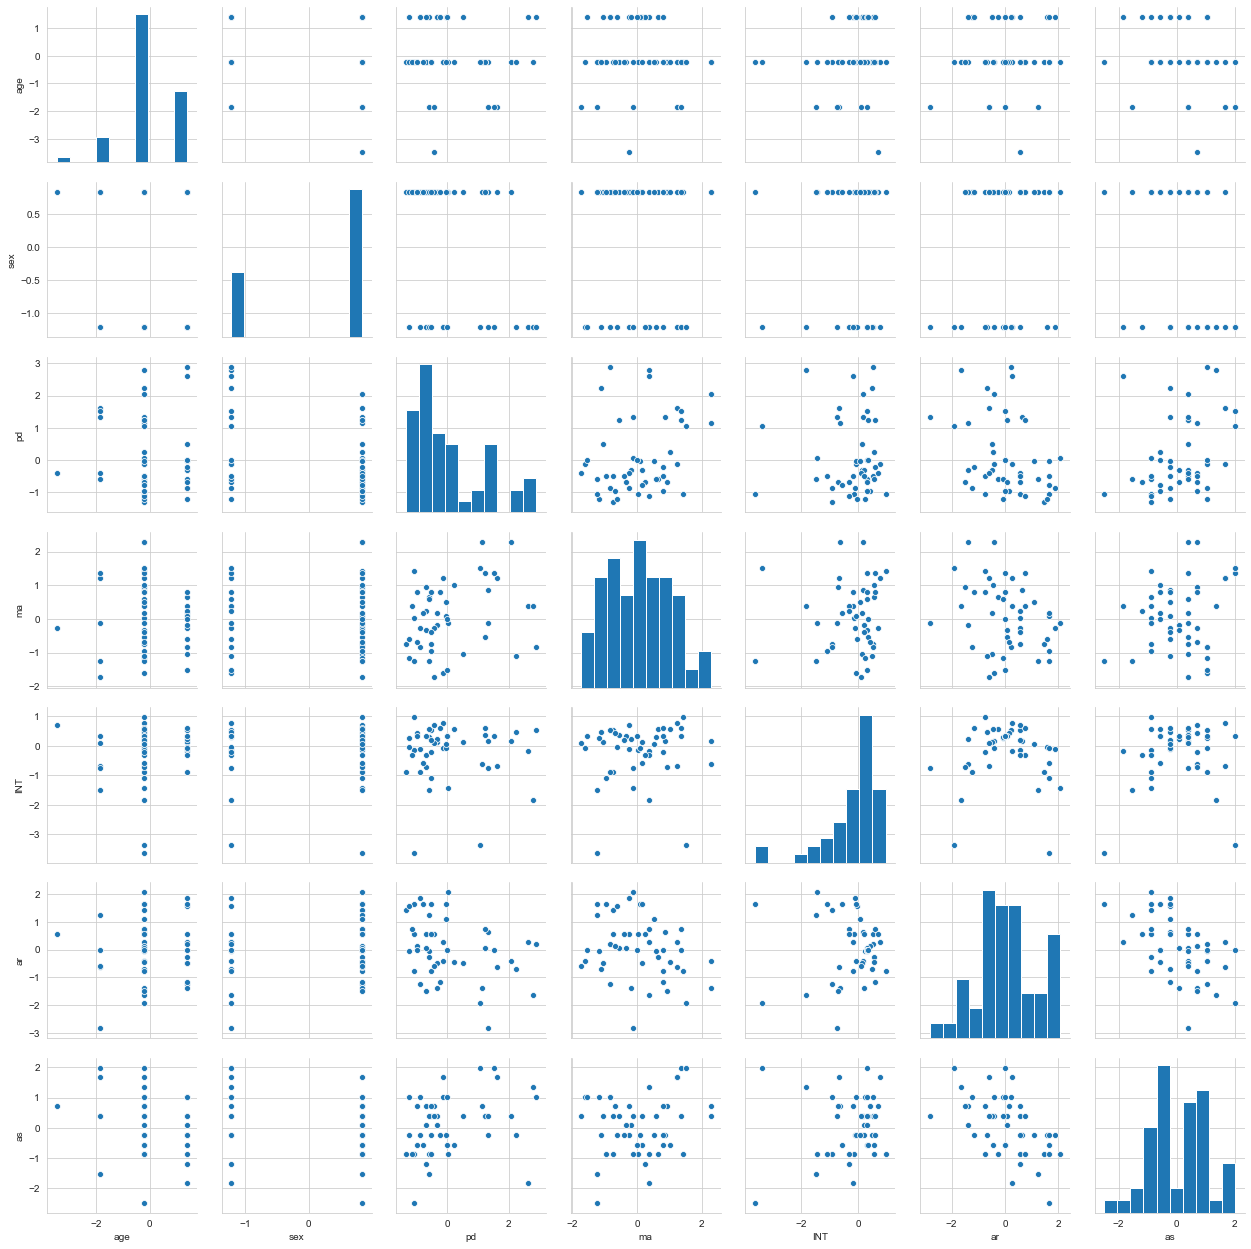

In [11]:
sns.set_style('whitegrid')
sns.pairplot(df)

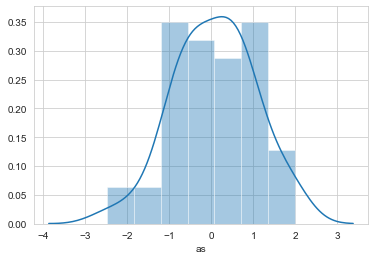

In [15]:
sns.distplot(df['as'])

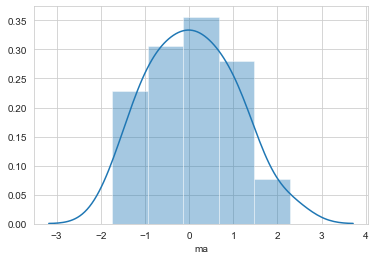

In [16]:
sns.distplot(df['ma'])

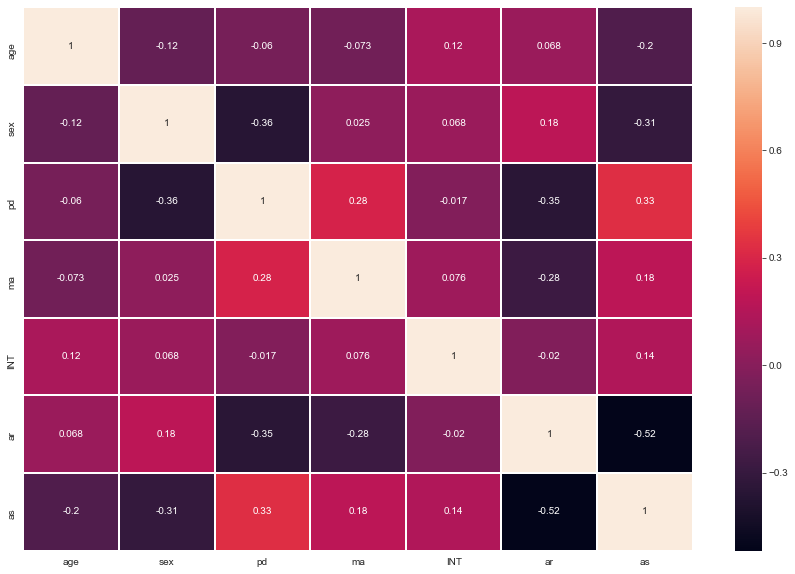

In [17]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True,linewidths=1, linecolor='white',)

## Training a Linear Regression Model

### X and y arrays

In [18]:
df.columns

Index(['age', 'sex', 'pd', 'ma', 'INT', 'ar', 'as'], dtype='object')

In [19]:
X = df[['age', 'sex', 'pd', 'ar', 'ma', 'INT']]
y = df['as']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Creating and Training the Model

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lm = LinearRegression()

In [24]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Evaluation


In [25]:
# print the intercept
print(lm.intercept_)

0.14164786509513452


In [26]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,-0.211812
sex,-0.144615
pd,0.172745
ar,-0.406716
ma,-0.135233
INT,0.412930


## Predictions from our Model


In [27]:
predictions = lm.predict(X_test)

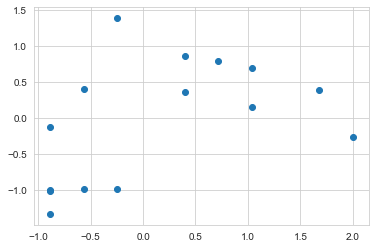

In [28]:
plt.scatter(y_test,predictions)

**Residual Histogram**

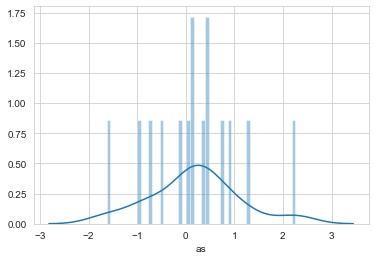

In [29]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics

In [30]:
from sklearn import metrics

In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.7059404704654657
MSE: 0.8685740427933009
RMSE: 0.9319731985380807
